In [77]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils2 import load_dataset


from testCases_v4 import *
from dnn_utils_v2 import sigmoid, sigmoid_backward, relu, relu_backward

%matplotlib inline

plt.rcParams['figure.figsize'] = (5.0, 4.0)#set default  size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)
train_x_orig, train_y, test_x_orig, test_y, classes = load_dataset()
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T 
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
hi5


In [78]:
train_x = train_x_flatten/255.
print("train/255, valores: "+ str(len(train_x)))
test_x = test_x_flatten/255.
print("test/255, valores: "+ str(len(test_x)))

train/255, valores: 12288
test/255, valores: 12288


In [79]:
# FUNCION: initialize_parameters 
def initialize_parameters(n_x, n_h, n_y): 
 
    np.random.seed(1)     
    b = 0.01
    W1 =  np.random.randn(n_h, n_x) * b    
    b1 =  np.zeros((n_h, 1))
    W2 =  np.random.randn(n_y, n_h) * b   
    b2 =  np.zeros((n_y, 1))         
    assert(W1.shape == (n_h, n_x))     
    assert(b1.shape == (n_h, 1))     
    assert(W2.shape == (n_y, n_h))     
    assert(b2.shape == (n_y, 1))          
    parameters = {"W1": W1,                   
                  "b1": b1,                   
                  "W2": W2,                   
                  "b2": b2}          
    return parameters   

#Probando la funcion 
parameters = initialize_parameters(3,2,1) 
print("W1 = " + str(parameters["W1"])) 
print("b1 = " + str(parameters["b1"])) 
print("W2 = " + str(parameters["W2"])) 
print("b2 = " + str(parameters["b2"])) 

W1 = [[ 0.01624345 -0.00611756 -0.00528172]
 [-0.01072969  0.00865408 -0.02301539]]
b1 = [[0.]
 [0.]]
W2 = [[ 0.01744812 -0.00761207]]
b2 = [[0.]]


In [80]:
# FUNCCION: initialize_parameters_deep 
def initialize_parameters_deep(layer_dims):     
    np.random.seed(3)     
    parameters = {}     
    L = len(layer_dims)            # number of layers in the network 
 
    for l in range(1, L):         
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01     
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1)) 
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))         
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))              
        
    return parameters 
    
 #probando la funcion
parameters = initialize_parameters_deep([5,4,3]) 

print('W1 = '+str(parameters['W1']))
print('b1 = '+str(parameters['b1']))
print('W2 = '+str(parameters['W2']))
print('b2 = '+str(parameters['b2']))

W1 = [[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]
b2 = [[0.]
 [0.]
 [0.]]


In [81]:
# FUNCTION: linear_forward 
def linear_forward(A, W, b):          
    Z = np.dot(W,A)+b       
    assert(Z.shape == (W.shape[0], A.shape[1]))     
    cache = (A, W, b)          
    
    return Z, cache

#Probando la función 
A, W, b = linear_forward_test_case() 
Z, linear_cache = linear_forward(A, W, b) 
print("Z = " + str(Z))

Z = [[ 3.26295337 -1.23429987]]


In [82]:
# FUNCTION: linear_activation_forward 
def linear_activation_forward(A_prev, W, b, activation):
    
    if activation == "sigmoid":         
        Z, linear_cache =  linear_forward(A_prev, W, b)          
        A, activation_cache =  sigmoid(Z)         
    elif activation == "relu":         
        Z, linear_cache =   linear_forward(A_prev, W, b)     
        A, activation_cache =   relu(Z)        
        
    assert (A.shape == (W.shape[0], A_prev.shape[1]))     
    cache = (linear_cache, activation_cache) 
 
    return A, cache


#Probando a la función 
A_prev, W, b = linear_activation_forward_test_case() 
A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid") 
print("With sigmoid: A = " + str(A)) 
A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu") 
print("With ReLU: A = " + str(A)) 

With sigmoid: A = [[0.96890023 0.11013289]]
With ReLU: A = [[3.43896131 0.        ]]


In [83]:
# FUNCTION: L_model_forward 
 
def L_model_forward(X, parameters): 
     
    caches = []     
    A = X     
    L = len(parameters)  // 2
    
    # número de capas de la red     
    caches = list() 
 
    # Implemente [LINEAR -> RELU]*(L-1). Agregue "cache" a la lista "caches"      
    for l in range(1, L):         
        A_prev = A  
        A, cache =  linear_activation_forward(A_prev,  parameters["W"+str(l)], parameters["b"+str(l)], activation="relu") 
        caches.append(cache)
    # Implementa LINEAR -> SIGMOID. Agregue "cache" a la lista  "caches".          
    AL, cache =  linear_activation_forward(A,  parameters["W"+str(L)], parameters["b"+str(L)], activation="sigmoid")
    caches.append(cache)
    assert(AL.shape == (1,X.shape[1]))                  
    
    return AL, caches 


#Probando la función 
X, parameters = L_model_forward_test_case_2hidden() 
print(parameters) 
print(len(parameters)) 
print("W"+str(2)) 
AL, caches = L_model_forward(X, parameters) 
print("AL = " + str(AL)) 
print("Length of caches list = " + str(len(caches)))

{'W1': array([[ 0.35480861,  1.81259031, -1.3564758 , -0.46363197,  0.82465384],
       [-1.17643148,  1.56448966,  0.71270509, -0.1810066 ,  0.53419953],
       [-0.58661296, -1.48185327,  0.85724762,  0.94309899,  0.11444143],
       [-0.02195668, -2.12714455, -0.83440747, -0.46550831,  0.23371059]]), 'b1': array([[ 1.38503523],
       [-0.51962709],
       [-0.78015214],
       [ 0.95560959]]), 'W2': array([[-0.12673638, -1.36861282,  1.21848065, -0.85750144],
       [-0.56147088, -1.0335199 ,  0.35877096,  1.07368134],
       [-0.37550472,  0.39636757, -0.47144628,  2.33660781]]), 'b2': array([[ 1.50278553],
       [-0.59545972],
       [ 0.52834106]]), 'W3': array([[ 0.9398248 ,  0.42628539, -0.75815703]]), 'b3': array([[-0.16236698]])}
6
W2
AL = [[0.03921668 0.70498921 0.19734387 0.04728177]]
Length of caches list = 3


In [84]:
def computer_cost(AL,Y):
    m=Y.shape[1]

    cost = -(1/m) * (np.sum(np.multiply(Y,np.log(AL)) + np.multiply((1-Y),(np.log(1-AL))))) 
    cost = np.squeeze(cost)
    assert(cost.shape==())
    
    return cost
#probando la funcion
Y, AL = compute_cost_test_case()
print("cost= "+ str(computer_cost(AL,Y)))


cost= 0.41493159961539694


In [85]:
def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    
    dW = (1/m) * (dZ@A_prev.T) 
    db = (1/m) * np.sum(dZ , axis=1, keepdims=True)
    dA_prev = W.T @ dZ
    assert(dA_prev.shape == A_prev.shape)
    assert(dW.shape == W.shape)
    assert(db.shape == b.shape)
    
    return dA_prev,dW, db

#probando la funcion
dZ, linear_cache = linear_backward_test_case()
dA_prev, dW, db = linear_backward(dZ, linear_cache)
print("dA_prev= "+ str(dA_prev))
print("dW= "+ str(dW))
print("db= "+ str(db))

dA_prev= [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]]
dW= [[-0.10076895  1.40685096  1.64992505]]
db= [[0.50629448]]


In [86]:
def linear_activation_backward(dA, cache, activation): 
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

#Probando la función 
dAL, linear_activation_cache = linear_activation_backward_test_case() 
 
dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache, activation = "sigmoid") 
print ("sigmoid:") 
print ("dA_prev = "+ str(dA_prev)) 
print ("dW = " + str(dW)) 
print ("db = " + str(db) + "\n") 
 
dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache, activation = "relu") 
print ("relu:") 
print ("dA_prev = "+ str(dA_prev)) 
print ("dW = " + str(dW)) 
print ("db = " + str(db)) 

sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]


In [87]:
def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL

    # Iniciando el backpropagation
    dAL = - ((Y / AL) - ((1 - Y)/ (1 - AL)))

    # en cada capa l (SIGMOID -> LINEAR) gradients. Entrada: "dAL, current_cache". Salida: 
    # "grads["dAL-1"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1] 
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward( dAL, current_cache, activation = "sigmoid" )

    # Loop de l=L-2 to l=0
    for l in reversed(range(L-1)):
        # En cada capa l: (RELU -> LINEAR) gradients.
        # Entrada: "grads["dA" + str(l + 1)], current_cache". Salida: 
        #"grads["dA" + str(l)] , grads["dW" + str(l +1)] , grads["db" + str(l + 1)]

        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l+1)],current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
    return grads

#Probando la función
AL, Y_assess, caches = L_model_backward_test_case()
grads = L_model_backward(AL, Y_assess, caches)
print_grads(grads)


dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
dA1 = [[ 0.12913162 -0.44014127]
 [-0.14175655  0.48317296]
 [ 0.01663708 -0.05670698]]


In [88]:

def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2 # numero de capas de la red
    for l in range(1,(L+1)):
        parameters["W" + str(l)] =(parameters["W" + str(l)] - learning_rate * (grads["dW" + str(l)]) )
        parameters["b" + str(l)] =(parameters["b" + str(l)] - learning_rate * (grads["db" + str(l)]) )
    return parameters

#Probando la función
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads, 0.1)
print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


In [89]:
def initialise_parametres(layer_dims):
    parameters = {}
    L = len(layer_dims)  # numero de capas
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l - 1]) *0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

        assert (parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l - 1]))
        assert (parameters['b' + str(l)].shape == (layer_dims[l], 1))

    return parameters
layersDim =[3, 20, 7, 5, 1]
f = initialise_parametres(layersDim)
print(f)


{'W1': array([[-0.01101068, -0.01185047, -0.0020565 ],
       [ 0.01486148,  0.00236716, -0.01023785],
       [-0.00712993,  0.00625245, -0.00160513],
       [-0.00768836, -0.00230031,  0.00745056],
       [ 0.01976111, -0.01244123, -0.00626417],
       [-0.00803766, -0.02419083, -0.00923792],
       [-0.01023876,  0.01123978, -0.00131914],
       [-0.01623285,  0.00646675, -0.00356271],
       [-0.01743141, -0.0059665 , -0.00588594],
       [-0.00873882,  0.00029714, -0.02248258],
       [-0.00267762,  0.01013183,  0.00852798],
       [ 0.01108187,  0.01119391,  0.01487543],
       [-0.01118301,  0.00845833, -0.0186089 ],
       [-0.00602885, -0.01914472,  0.01048148],
       [ 0.01333738, -0.00197415,  0.01774645],
       [-0.00674728,  0.00150617,  0.00152946],
       [-0.01064195,  0.00437947,  0.01938978],
       [-0.01024931,  0.00899338, -0.00154507],
       [ 0.01769627,  0.00483788,  0.00676216],
       [ 0.00643163,  0.00249087, -0.01395764]]), 'b1': array([[0.],
       [0.],

In [90]:
def predict(X, y, parameters):

    m = X.shape[1]
    n = len(parameters) // 2
    p = np.zeros((1, m))

    probas, caches = L_model_forward(X, parameters)

    for i in range(0, probas.shape[1]):
        if probas[0, i] > 0.75:
            p[0, i] = 1
        else:
            p[0, i] = 0

    print("Accuracy: " + str(np.sum((p == y) / (m*1.0))))

    return p

In [166]:
def model(X, Y, layers_dims, learning_rate = 1.2, num_iterations = 3000, print_cost=False):

    costs = []                       
    
    parameters = initialize_parameters_deep(layers_dims)
    
    for i in range(0, num_iterations):

        AL, caches = L_model_forward(X, parameters)
        
        cost = computer_cost(AL, Y)

        grads = L_model_backward(AL, Y, caches)
    
        parameters = update_parameters(parameters, grads, learning_rate)
    
        if print_cost and i % 100 == 0:
            print ("Costo despues iteracion %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    plt.plot(np.squeeze(costs))
    plt.ylabel('costo')
    plt.xlabel('itetaciones')
    plt.title("tasa aprendizaje =" + str(learning_rate))
    plt.show()
    
    return parameters

Costo despues iteracion 0: 0.693188
Costo despues iteracion 100: 0.644172
Costo despues iteracion 200: 0.643974
Costo despues iteracion 300: 0.643974
Costo despues iteracion 400: 0.643974
Costo despues iteracion 500: 0.643974
Costo despues iteracion 600: 0.643972
Costo despues iteracion 700: 0.643974
Costo despues iteracion 800: 0.643974
Costo despues iteracion 900: 0.643974
Costo despues iteracion 1000: 0.643974
Costo despues iteracion 1100: 0.643974
Costo despues iteracion 1200: 0.643974
Costo despues iteracion 1300: 0.643974
Costo despues iteracion 1400: 0.643974
Costo despues iteracion 1500: 0.643974
Costo despues iteracion 1600: 0.643974
Costo despues iteracion 1700: 0.643974
Costo despues iteracion 1800: 0.643974
Costo despues iteracion 1900: 0.643974
Costo despues iteracion 2000: 0.643974
Costo despues iteracion 2100: 0.643974
Costo despues iteracion 2200: 0.643974
Costo despues iteracion 2300: 0.643974
Costo despues iteracion 2400: 0.643974


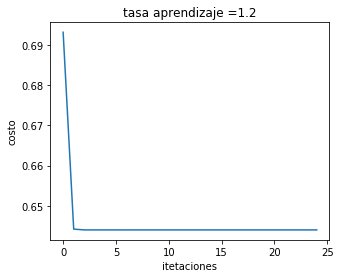

In [162]:
parameters = model(train_x, train_y, [12288, 20, 7, 1], num_iterations = 2500, print_cost = True)